<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens once you have a solid baseline, layer in the star rating in your visualization(s). The key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [ ]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.2 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=6057c6818cc9d57789a3293b46c4b9ca6a963f31094d0ae06dd8135991289033
  Stored in directory: /tmp/pip-ephem-wheel-cache-xl136hql/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
!pip install squarify

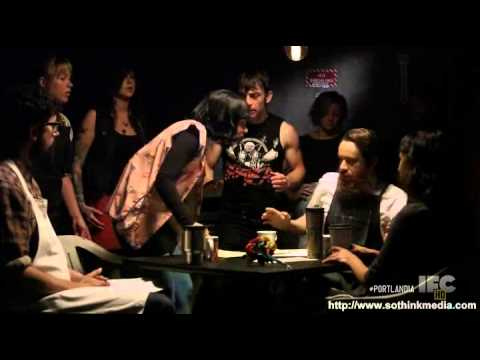

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

'/content'

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [ ]:
# Start here
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_shop_name  7616 non-null   object
 1   full_review_text  7616 non-null   object
 2   star_rating       7616 non-null   object
dtypes: object(3)
memory usage: 178.6+ KB


In [ ]:
shops['star_rating'] = shops['star_rating'].apply(lambda x : int(x[1]))
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


In [ ]:
print(shops['full_review_text'][3])

 11/25/2016 Very cool decor! Good drinks Nice seating  However...  Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd.  Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average.  It feels like a Los Angeles coffee shot that is out of place. 


In [ ]:
shops['date'] = shops['full_review_text'].apply(lambda x : x.split()[0])

In [ ]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,12/3/2016


In [ ]:
import datetime

In [ ]:
def datify(date):
  data = date.split('/')

  dated = datetime.date(
      int(data[2]),
      int(data[0]),
      int(data[1])
  )
  return dated

shops['date'].apply(lambda x : datify(x).strftime('%A')).value_counts()

Sunday       1279
Saturday     1154
Monday       1146
Wednesday    1092
Thursday     1011
Tuesday       983
Friday        951
Name: date, dtype: int64

In [ ]:
def reattach(word_list):
  string = ''
  for x in word_list:
    string += f'{x} '
  
  return string[:-1]

In [ ]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x : reattach(x.split()[1:]))

In [ ]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shop has a rating between 1 & 3 based on the ratings distribution. A 'good' coffee shop is a 4 or 5. 

In [ ]:
import re

In [ ]:
def tokenize(text):
  tokens = re.sub('[^a-zA-Z 0-9]', '', text)
  tokens = tokens.lower().split()
  return tokens

In [ ]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [ ]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ..."


In [ ]:
from collections import Counter

In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')

In [ ]:
def get_lemmas(text):
  lemmas = []

  doc = nlp(text)

  for token in doc:
    if not token.is_stop and not token.is_punct and token.pos != 'PRON':
      lemmas.append(token.lemma_)

  return lemmas

In [ ]:
shops['lemmatoken'] = shops['full_review_text'].apply(get_lemmas)

In [ ]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,lemmatoken
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, Date, Night, Austin, ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, check, locate, Northcross, mall, shopping,..."


In [ ]:
bad = shops[shops['star_rating'] <= 3]
good = shops[shops['star_rating'] > 3]

In [ ]:
bad.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,lemmatoken
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[cool, decor, good, drink, nice, seating, over..."
8,The Factory - Cafe With a Soul,"1 check-in Ok, let's try this approach... Pros...",3,10/25/2016,"[1, checkin, ok, lets, try, this, approach, pr...","[1, check, ok, let, try, approach, pro, music,..."
11,The Factory - Cafe With a Soul,"The store has A+ decoration, but honestly, the...",3,11/20/2016,"[the, store, has, a, decoration, but, honestly...","[store, a+, decoration, honestly, coffee, good..."
12,The Factory - Cafe With a Soul,1 check-in Listed in 2016 - The Third Time is ...,3,11/17/2016,"[1, checkin, listed, in, 2016, the, third, tim...","[1, check, list, 2016, Time, Charm, Factory, a..."
25,The Factory - Cafe With a Soul,"Okay, so after visiting my friends in LA and t...",1,12/2/2016,"[okay, so, after, visiting, my, friends, in, l...","[okay, visit, friend, LA, try, mint, mojito, i..."


In [ ]:
good.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,lemmatoken
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, Date, Night, Austin, ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, check, list, Brunch, Spots, love, eclectic..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, check, locate, Northcross, mall, shopping,..."
5,The Factory - Cafe With a Soul,1 check-in Very cute cafe! I think from the mo...,4,11/20/2016,"[1, checkin, very, cute, cafe, i, think, from,...","[1, check, cute, cafe, think, moment, step, fi..."


## Can you visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [ ]:
import squarify
import matplotlib.pyplot as plt

In [ ]:
def count(df, tokname = 'lemmatoken'):
  tokens = df[tokname]
  
  word_counts = Counter()
  appears_in = Counter()

  total_docs = len(tokens)

  for token in tokens:
    word_counts.update(token)
    appears_in.update(set(token))

  temp = zip(word_counts.keys(), word_counts.values())
  wc = pd.DataFrame(temp, columns = ['word', 'count'])
  wc['rank'] = wc['count'].rank(method='first', ascending=False)
  total = wc['count'].sum()

  wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)
  
  wc = wc.sort_values(by='rank')
  wc['cul_pct_total'] = wc['pct_total'].cumsum()

  t2 = zip(appears_in.keys(), appears_in.values())
  ac = pd.DataFrame(t2, columns=['word', 'appears_in'])

  wc = ac.merge(wc, on='word')
  wc['appears_in_pct'] = wc['appears_in'].apply(lambda x : x / total_docs)

  return wc.sort_values(by='rank')


def square_plot(df):
  wc = count(df)
  wc_top20 = wc[wc['rank'] <= 20]

  squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
  plt.axis('off')
  plt.show()

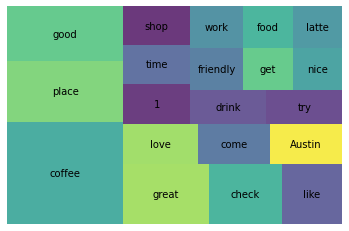

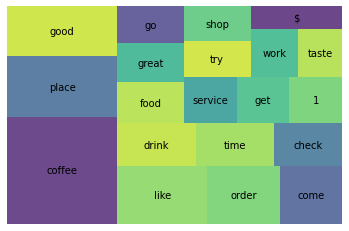

In [ ]:
square_plot(good)
square_plot(bad)

In [ ]:
count(bad).head(5)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,coffee,935,2126,1.0,0.026844,0.026844,0.633469
25,place,753,1227,2.0,0.015493,0.042336,0.510163
29,good,642,994,3.0,0.012551,0.054887,0.434959
22,like,596,945,4.0,0.011932,0.066819,0.403794
55,order,433,763,5.0,0.009634,0.076453,0.293360


In [ ]:
df = good
count(df)[count(df)['word'] == 'terrible']
.028434 - .026844

0.0015900000000000011

In [ ]:
count(good).head(5)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
27,coffee,3919,8038,1.0,0.028434,0.028434,0.638274
69,place,3128,4807,2.0,0.017005,0.045439,0.509446
197,good,2912,4311,3.0,0.015250,0.060689,0.474267
138,great,2495,3454,4.0,0.012219,0.072908,0.406352
31,check,2686,2942,5.0,0.010407,0.083315,0.437459


In [ ]:
def compare_appears(df1, df2, perdiff=.1, name1='Good Reviews', name2='Bad Reviews'):
  goodcount = count(df1)
  badcount = count(df2)
  goodwords = []

  goodtests = goodcount[goodcount['appears_in_pct'] >= .03]
  badtests = badcount[badcount['appears_in_pct'] >= .03]

  print(f'{name1}:')
  for x in goodtests['word']:
    goodrow = goodtests[goodtests['word'] == x]
    badrow = badcount[badcount['word'] == x]
    
    try:
      change = float(goodrow['appears_in_pct']) - float(badrow['appears_in_pct'])
    except:
      change = float(goodrow['appears_in_pct'])

    if change > perdiff:
      print(f'\'{x}\' appears {change * 100}% more reviews.')
      goodwords.append(x)

  print(f'\n{name2}:')
  for x in badtests['word']:
    goodrow = goodcount[goodcount['word'] == x]
    badrow = badtests[badtests['word'] == x]
    
    try:
      change = float(badrow['appears_in_pct']) - float(goodrow['appears_in_pct'])
    except:
      change = float(badrow['appears_in_pct'])

    if change > perdiff and x not in goodwords:
      print(f'\'{x}\' appears in {change * 100}% more reviews.')

  
def compare_total(df1, df2, perdiff=.001, name1='Good Reviews', name2='Bad Reviews'):
  goodcount = count(df1)
  badcount = count(df2)
  goodwords = []

  goodtests = goodcount[goodcount['pct_total'] >= .001]
  badtests = badcount[badcount['pct_total'] >= .001]

  print(f'{name1}:')
  for x in goodtests['word']:
    goodrow = goodtests[goodtests['word'] == x]
    badrow = badcount[badcount['word'] == x]
    
    try:
      change = float(goodrow['pct_total']) - float(badrow['pct_total'])
    except:
      change = float(goodrow['pct_total'])

    if change > perdiff:
      print(f'\'{x}\' appears {change * 100}% more.')
      goodwords.append(x)

  print(f'\n{name2}:')
  for x in badtests['word']:
    goodrow = goodcount[goodcount['word'] == x]
    badrow = badtests[badtests['word'] == x]
    
    try:
      change = float(badrow['pct_total']) - float(goodrow['pct_total'])
    except:
      change = float(badrow['pct_total'])

    if change > perdiff and x not in goodwords:
      print(f'\'{x}\' appears {change * 100}% more.')

In [ ]:
compare_appears(good, bad, perdiff=.06)

Good Reviews:
'great' appears 17.125694058243514% more reviews.
'check' appears 10.615847037949205% more reviews.
'love' appears 11.72739952155222% more reviews.
'Austin' appears 8.750915847920693% more reviews.
'friendly' appears 10.731928003319121% more reviews.
'delicious' appears 12.650309402116822% more reviews.
'definitely' appears 6.2783912855415185% more reviews.
'in' appears 7.722650353539365% more reviews.
'amazing' appears 7.84438088680561% more reviews.
'favorite' appears 7.1310346653955134% more reviews.
'perfect' appears 7.504303381796032% more reviews.

Bad Reviews:
'like' appears in 13.05041356602491% more reviews.
'order' appears in 12.7888120900753% more reviews.
'come' appears in 6.486498415472755% more reviews.
'time' appears in 6.598607028415559% more reviews.
'go' appears in 8.795494469602676% more reviews.
'service' appears in 9.532939629070558% more reviews.
'taste' appears in 8.329802353398126% more reviews.
'$' appears in 8.352709585727778% more reviews.
'pret

In [ ]:
compare_total(good, bad, perdiff=.002)

Good Reviews:
'good' appears 0.26995266224908615% more.
'great' appears 0.6334634470451606% more.
'check' appears 0.37532194425478643% more.
'love' appears 0.41842105908641064% more.
'Austin' appears 0.33926156894826087% more.
'friendly' appears 0.2723937511569498% more.
'delicious' appears 0.3307710667001743% more.
'amazing' appears 0.21067088601401338% more.

Bad Reviews:
'like' appears 0.3318140725426924% more.
'order' appears 0.4791113747088909% more.
'go' appears 0.20134957738881668% more.
'service' appears 0.23844436479004008% more.
'taste' appears 0.21029507927786298% more.
'$' appears 0.2854425755661607% more.
'ask' appears 0.28831474544576496% more.
'customer' appears 0.26155410952939256% more.
'say' appears 0.22074150780998944% more.
'bad' appears 0.2083865883378206% more.


# Conclusion
Looking at the numbers generated above, it appears that the staff were friendly and the food tasty.

The bad reviews appear to worry about the money and bad service.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

